## Exercise: Predict Annual Income for Year 2020

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [59]:
path_to_data = './data/canada_per_capita_income.csv'
df = pd.read_csv(path_to_data)
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [61]:
df.shape

(47, 2)

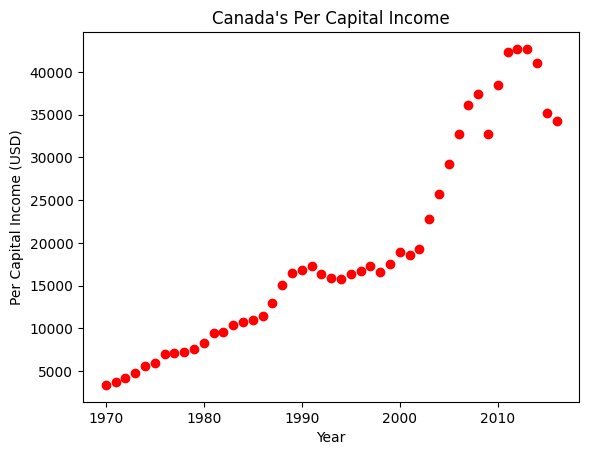

In [62]:
plt.title("Canada's Per Capital Income")
plt.ylabel('Per Capital Income (USD)')
plt.xlabel('Year')
plt.scatter(df['year'], df[['per capita income (US$)']] ,color = 'red')

## 1. Build and Train Regression Model

In [63]:
# Create Liner Regression Object
reg= linear_model.LinearRegression()

In [64]:
reg.fit(df[['year']], df['per capita income (US$)'])

LinearRegression()

In [65]:
predicted_income_2020= reg.predict([[2020]])
predicted_income_2020

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

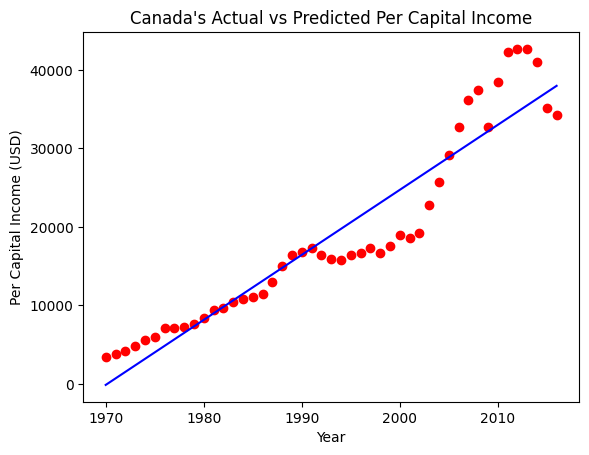

In [66]:
# plot predicted vs actual values
plt.title("Canada's Actual vs Predicted Per Capital Income")
plt.ylabel('Per Capital Income (USD)')
plt.xlabel('Year')
plt.scatter(df[['year']], df['per capita income (US$)'], color='red')
# Plotting the regression line
plt.plot(df[['year']], reg.predict(df[['year']]), color='blue')

In [67]:
# Performing a prediction manually to verify model correctness
m= reg.coef_
b= reg.intercept_
x= 2020
y = m * x + b
y

array([41288.69409442])

## 2. Test Regression Model

In [68]:
df2 = pd.read_csv('./data/years.csv')
df2.head()

,year
0,2020
1,2021
2,2022
3,2023
4,2024


In [69]:
df2.shape

(47, 1)

In [70]:
predicted_incomes = reg.predict(df2)
predicted_incomes

array([41288.69409442, 42117.15916964, 42945.62424486, 43774.08932009,
       44602.55439531, 45431.01947053, 46259.48454575, 47087.94962098,
       47916.4146962 , 48744.87977142, 49573.34484664, 50401.80992187,
       51230.27499709, 52058.74007231, 52887.20514754, 53715.67022276,
       54544.13529798, 55372.6003732 , 56201.06544843, 57029.53052365,
       57857.99559887, 58686.46067409, 59514.92574932, 60343.39082454,
       61171.85589976, 62000.32097499, 62828.78605021, 63657.25112543,
       64485.71620065, 65314.18127588, 66142.6463511 , 66971.11142632,
       67799.57650154, 68628.04157677, 69456.50665199, 70284.97172721,
       71113.43680244, 71941.90187766, 72770.36695288, 73598.8320281 ,
       74427.29710333, 75255.76217855, 76084.22725377, 76912.69232899,
       77741.15740422, 78569.62247944, 79398.08755466])

In [71]:
len(predicted_incomes)

47

In [72]:
df2['predicted_income'] = predicted_incomes
df2.head()

,year,predicted_income
0,2020,41288.694094
1,2021,42117.159170
2,2022,42945.624245
3,2023,43774.089320
4,2024,44602.554395


In [73]:
df2.to_csv('./data/predicted_incomes.csv', index=False)